# Useful links

- https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
- https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/
- https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/

In [48]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [11]:
train_set = np.load("pedtrainset.npy")
train_set_labels = np.load("pedtrainlabels.npy")
test_set = np.load("pedtestset.npy")
test_set_labels = np.load("pedtestlabels.npy")

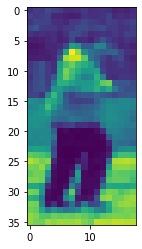

In [52]:
copy_cat = deepcopy(train_set)
copy_cat = copy_cat.reshape(39200, 36, 18)
plt.imshow(copy_cat[0])

In [82]:
np.sum(train_set, axis=1)

array([54366, 51687, 88977, ..., 53254, 62871, 54448], dtype=uint64)

In [14]:
test_set.shape

(9800, 648)

In [15]:
test_set_labels.shape

(9800,)

In [16]:
def sigmoid_function(z):
    # Use the property sigmoid(z) = 1 / (1 + exp(-z)) to handle large z values
    if z >= 0:
        return 1.0 / (1.0 + np.exp(-z))
    else:
        a = np.exp(z)
        return a / (1.0 + a)


In [17]:
def BinaryCrossEntropy(y, y_hat, e = 1e-15) -> float:
    y_hat = np.clip(y_hat, e, 1 - e)
    term_0 = (1 - y) * np.log(1 - y_hat + e)  
    term_1 = y * np.log(y_hat + e)  
    return -np.mean(term_0 + term_1)

In [59]:
def compute_gradients(x, y_true, y_pred):
    # derivative of binary cross entropy
    difference =  y_pred - y_true
    gradient_b = np.mean(difference)
    gradients_w = np.matmul(x.transpose(), difference)
    gradients_w = np.array([np.mean(grad) for grad in gradients_w])

    return gradients_w, gradient_b

In [34]:
w = np.random.rand(1, 648)
b = 1

In [83]:
z = np.matmul(w, train_set.T) + b
z.shape

(1, 39200)

In [90]:
yhat = 1/(1+np.exp(-z))
dz = train_set_labels - yhat 


-0.5102040816326531

In [63]:
epochs = 1
for i in range(epochs):
    z = np.matmul(w, train_set.T) + b # OK
    yhat = 1/(1+np.exp(-z))           # OK 
    dz = train_set_labels - yhat      # OK
    db = np.mean(dz)